In [1]:
import numpy as np
import pandas as pd 
from utils import *
# from tslearn.clustering import TimeSeriesKMeans
# from tslearn.datasets import CachedDatasets
# from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
#     TimeSeriesResampler

In [2]:
df = pd.read_csv('Grid300_30days.csv')
datetime_col = 'Datetime'

if type(df[datetime_col][0]) == str:            
        df[datetime_col] = pd.to_datetime(df[datetime_col])            


In [3]:
df.head(3)

,Day,Datetime,GridID,Day_int,SMSin,SMSout,Callin,Callout,Internet
0,Friday,2013-11-01 00:00:00,300,5,0.378276,0.081514,0.161390,0.08153,12.500507
1,Friday,2013-11-01 00:10:00,300,5,0.040875,0.040909,0.000000,0.16139,13.176712
2,Friday,2013-11-01 00:20:00,300,5,0.163028,0.040774,0.040757,0.16139,11.481703


### Graph on hourly activities per day, for 30 days

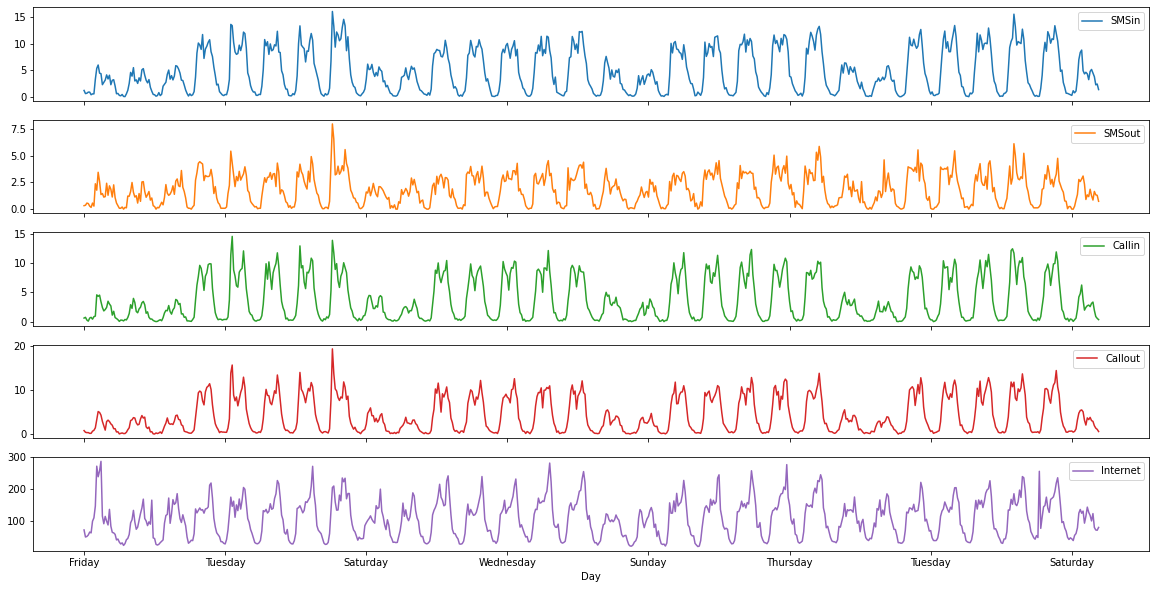

In [4]:
# Getting hourly analysis
df_hourly = get_hourly_data(df, datetime_col = 'Datetime')
df_hourly.drop(columns=['GridID', 'Day_int'], inplace = True)
df_hourly.insert(0, 'Day', df_hourly.index.day_name())
_ = df_hourly.plot(x = 'Day', subplots = True, figsize = (20,10))

### Graph on total daily activities per month

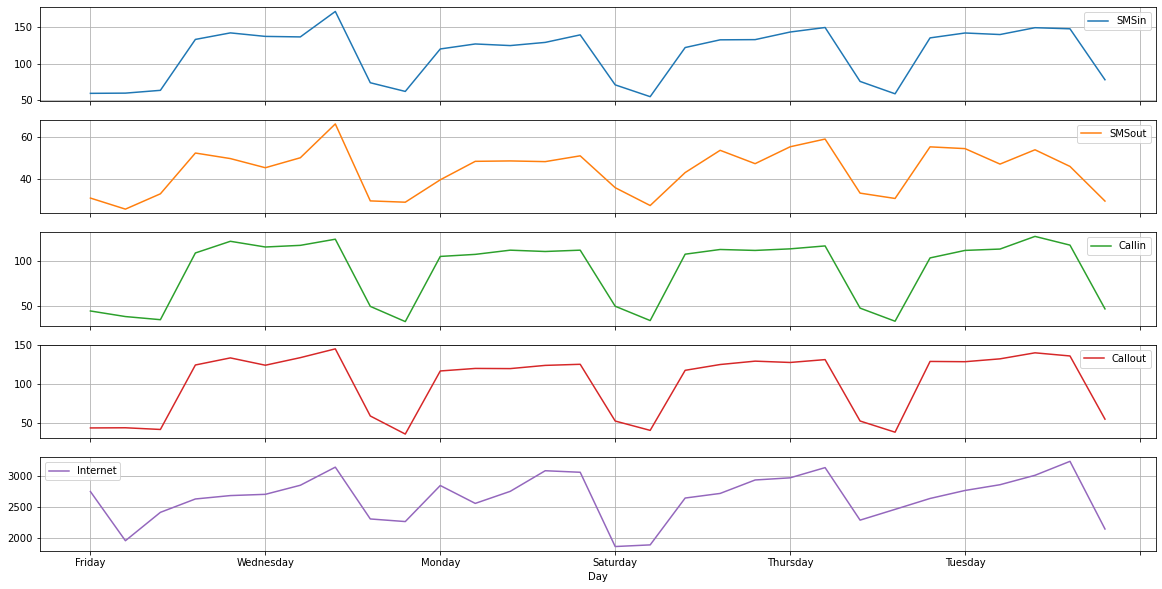

In [5]:
# Getting Daily analysis
df_daily = get_hourly_data(df, aggregate_time = '1440')
df_daily.drop(columns=['GridID', 'Day_int'], inplace = True)
df_daily.insert(0, 'Day', df_daily.index.day_name())
_ = df_daily.plot(x = 'Day', subplots = True, 
                  figsize = (20,10), grid = True
                  # xticks = [0, 7, 14, 21, 28]
                 )

### Activity on a Particular day

In [6]:
df_daily[df_daily['Day'] == 'Friday']

,Day,SMSin,SMSout,Callin,Callout,Internet
Datetime,,,,,,
2013-11-01,Friday,59.448309,31.196221,44.176528,44.284278,2750.828022
2013-11-08,Friday,171.302611,65.933908,124.806430,144.731144,3141.266536
2013-11-15,Friday,139.322522,50.984430,112.497305,125.141532,3059.549221
2013-11-22,Friday,149.389432,58.847663,117.257874,131.082753,3133.854447
2013-11-29,Friday,147.613722,46.019982,118.157386,135.711298,3234.462417


In [7]:
Summary_df = df.groupby('Day').Internet.agg(['count', 'min', 'max', 'mean', 'median', 'var', 'std'])
Summary_df

,count,min,max,mean,median,var,std
Day,,,,,,,
Friday,720,3.754245,73.623696,21.277723,20.218700,151.570220,12.311386
Monday,576,3.113699,83.213359,18.692844,19.207843,117.563987,10.842693
Saturday,720,3.190416,47.165393,14.712116,14.188395,51.966984,7.208813
Sunday,576,2.903415,45.054710,15.716185,14.992787,74.672096,8.641302
Thursday,576,4.223710,62.727218,20.689981,21.238343,136.805334,11.696381
Tuesday,576,2.929667,55.499180,18.640785,19.247996,101.111706,10.055432
Wednesday,576,4.181248,57.424635,19.543552,20.473179,116.295557,10.784042


<AxesSubplot:xlabel='Day'>

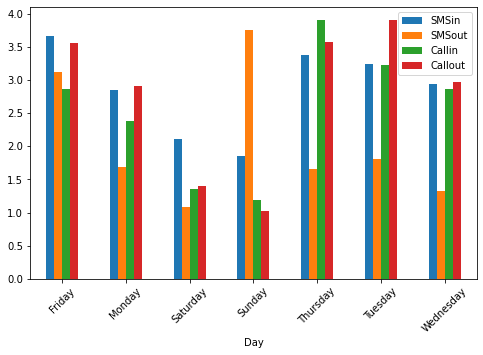

In [8]:
df2 = df.copy()
df2.drop(columns=['Internet', 'GridID', 'Day_int', 'Datetime'], inplace = True)
df2.groupby('Day').max().plot(kind = 'bar', rot = 45, figsize = (8,5))

# Clustering


# Stationarity Test

#### We perform the stationarity test on our data using  Augmented Dicky-Fuller test.

### Theory

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

--><b>Null Hypothesis (H0)</b>: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.<br>
--><b>Alternate Hypothesis (H1)</b>: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

The procedure of the test is that we calculate the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary). 

-> p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
-> p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

For further details, read [Ref1](https://machinelearningmastery.com/time-series-data-stationary-python/) and [Ref2](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)

In [9]:
stationarity_test(df, Target_variable='Internet')

ADF Statistic: -9.123553
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


The given series is Stationary, as p-value is 3.1577003887222307e-15 <= 0.05. 
Furthermore, the ADF Statistic is much smaller than 1\% cricitical value.


0

## Reference : Click [here](https://machinelearningmastery.com/time-series-data-stationary-python/) 